In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.getcwd()
data = path + '/dataset/bank/bank-additional/bank-additional-full.csv'
df = pd.read_csv(data, sep=';')
print(f'size of the data --> {df.shape}')
df.head()

size of the data --> (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# create table listing column types etc
df_info = pd.DataFrame([df.columns,df.dtypes, df.isna().sum(), df.nunique()])
df_info = df_info.T
df_info.columns = ['column','dtype','NA_count', 'unique_count']
print(f'check for duplicates --> {df.duplicated().sum()}')
# drop duplicates, 12 rows
df = df.drop_duplicates()
df_info

check for duplicates --> 12


,column,dtype,NA_count,unique_count
0,age,int64,0,78
1,job,object,0,12
2,marital,object,0,4
3,education,object,0,8
4,default,object,0,3
5,housing,object,0,3
6,loan,object,0,3
7,contact,object,0,2
8,month,object,0,10
9,day_of_week,object,0,5


## Feature description

# Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Term Deposits


A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

# Distribution of categorical

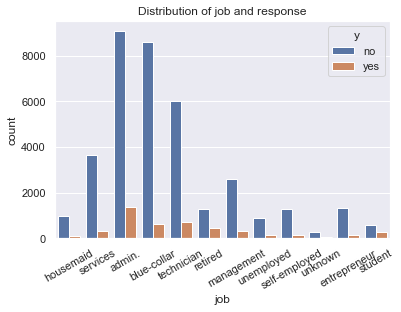

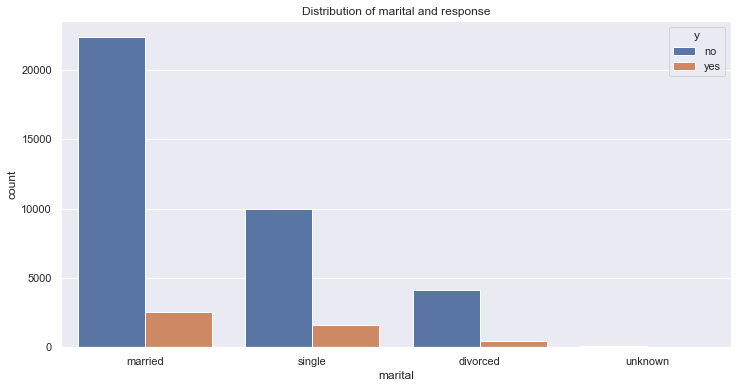

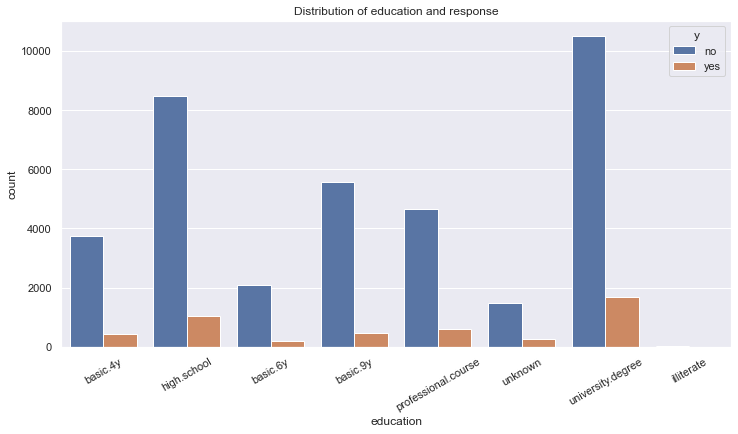

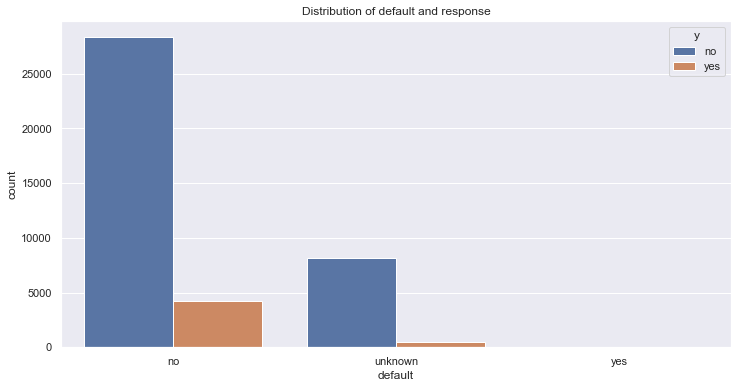

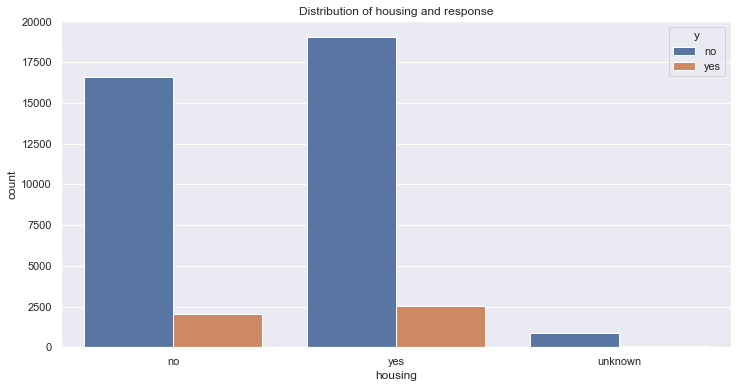

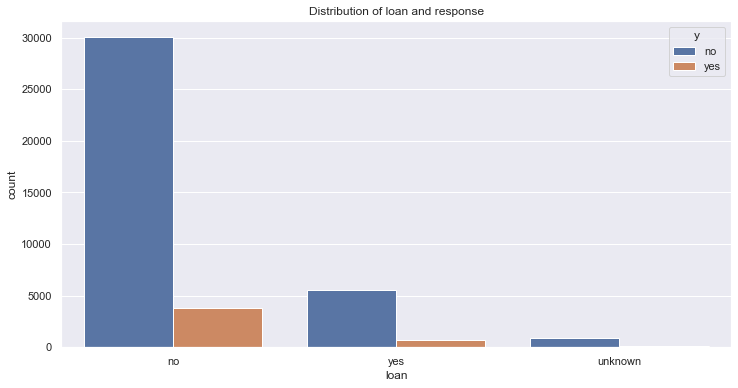

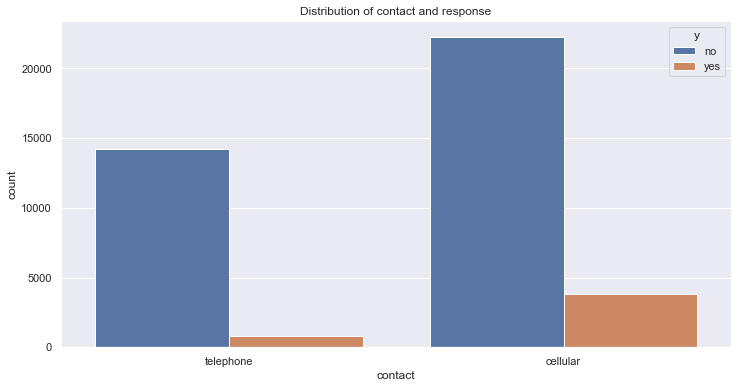

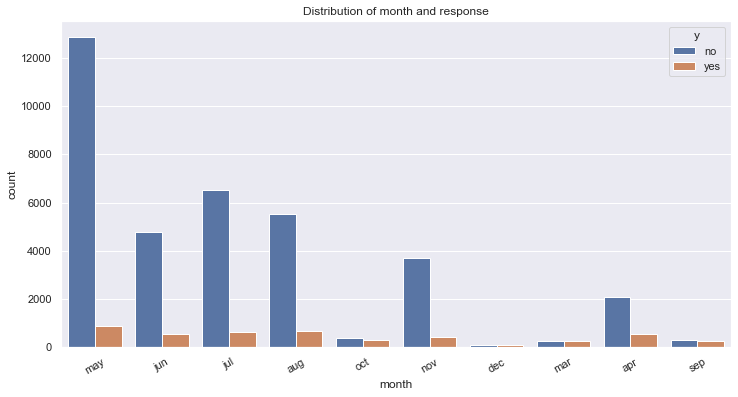

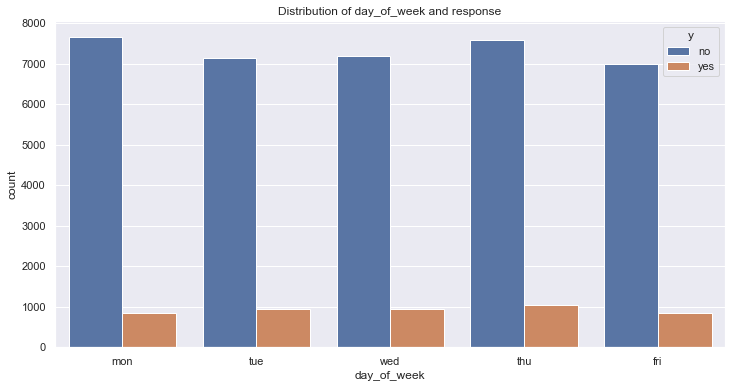

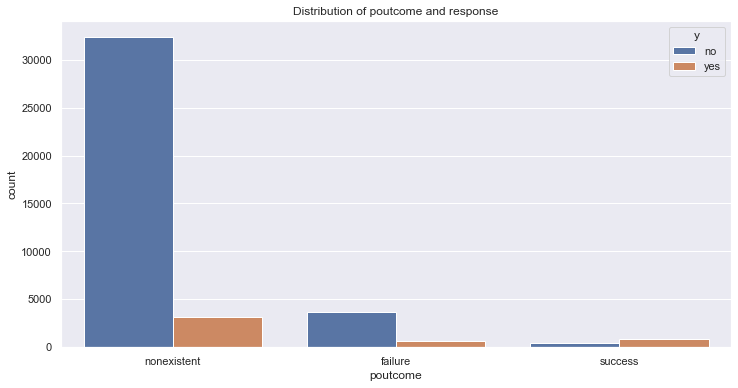

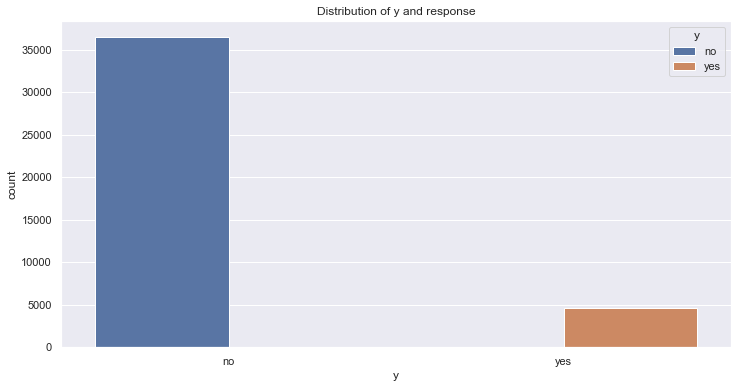

In [4]:
'''plot bar chart for categorical variables'''
for col in df.select_dtypes(include='object').columns:
    sns.set(rc={'figure.figsize':(12,6)})
    sns.countplot(data=df, x=str(col), hue='y').set(title='Distribution of {} and response'.format(col))
    if len(df[col].unique()) > 5:       # rotate ticks to avoid overlapping
        plt.xticks(rotation=30)
    plt.show()

# Distribution of numerical data

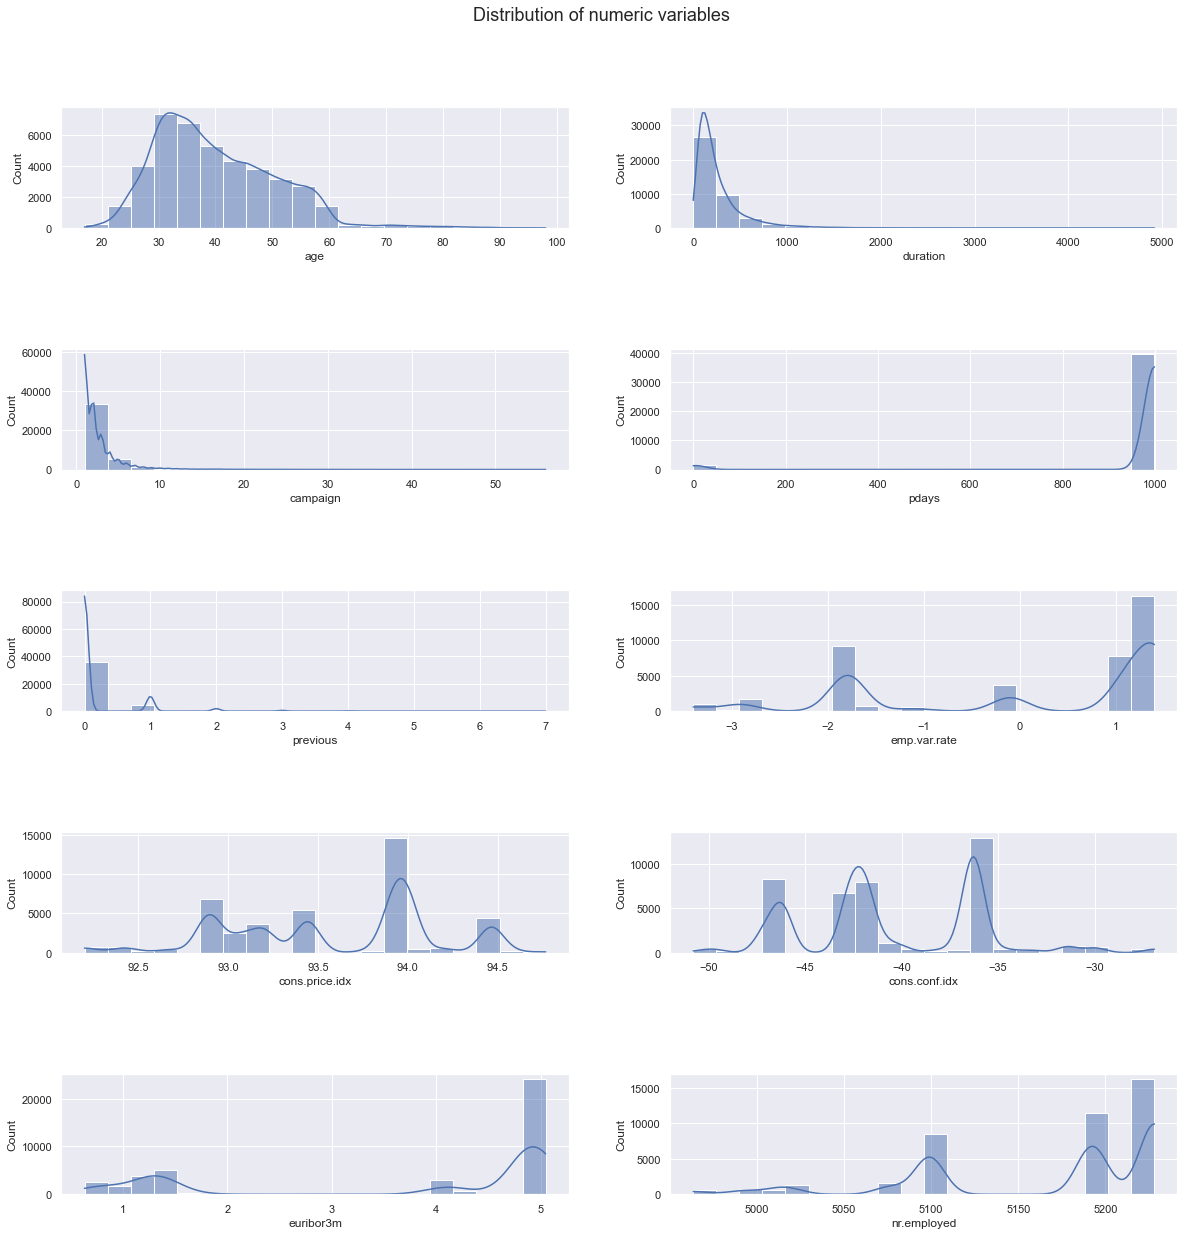

In [5]:
'''distribution of numeric variables'''
sns.set_style("darkgrid")
plt.subplots(figsize = (20,20))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution of numeric variables", fontsize=18, y=0.95)
df_num = df.select_dtypes(exclude='object')
for i,col in enumerate(df_num.columns):
    ax = plt.subplot(5,2,i+1)
    sns.histplot(data=df_num, x=col, bins=20, kde=True, ax=ax)
    # plt.show()
plt.show()

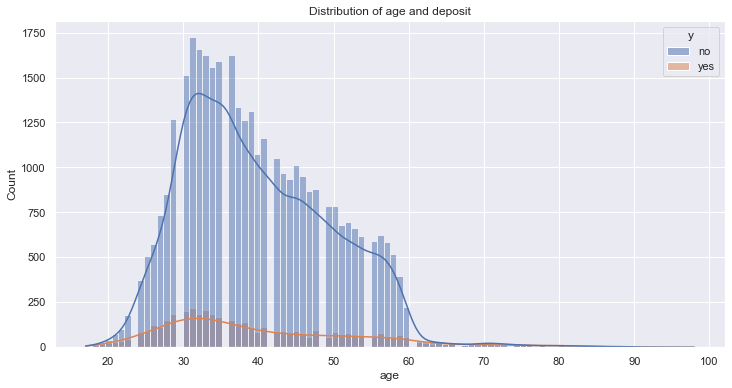

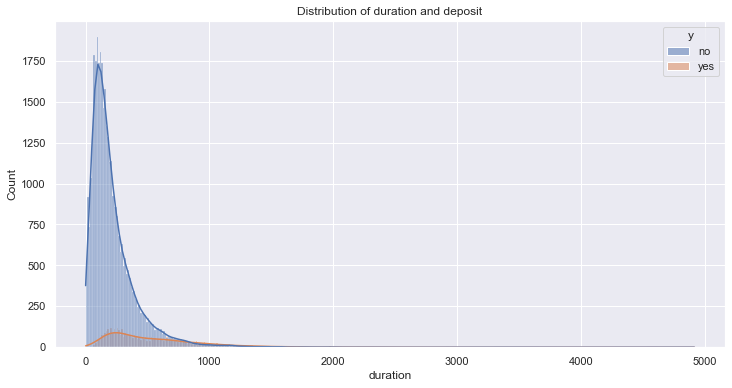

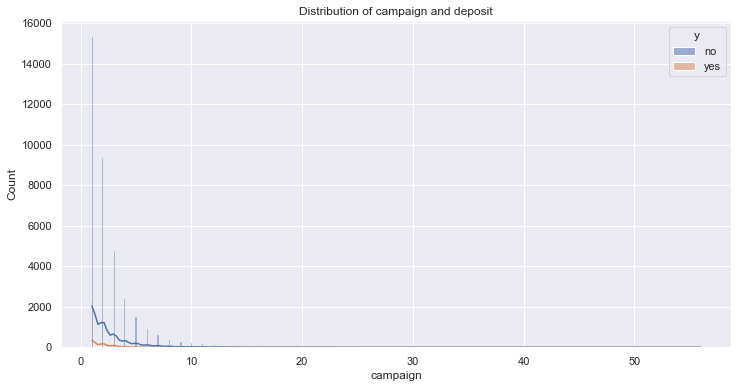

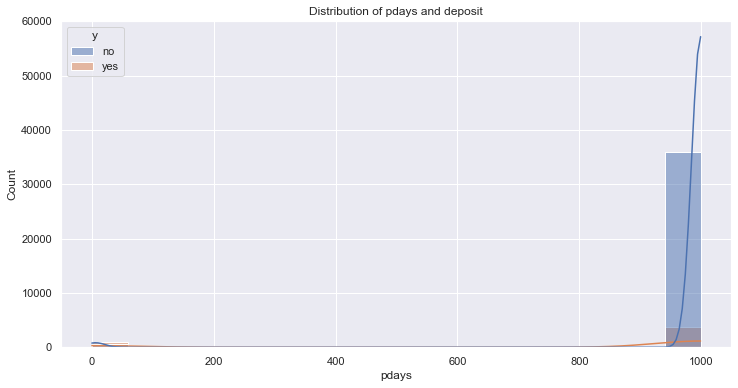

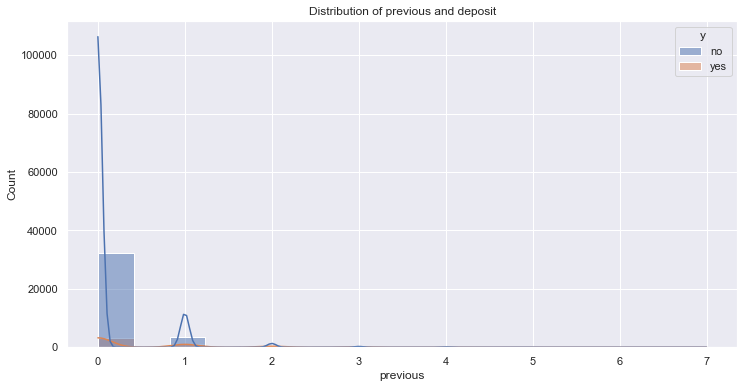

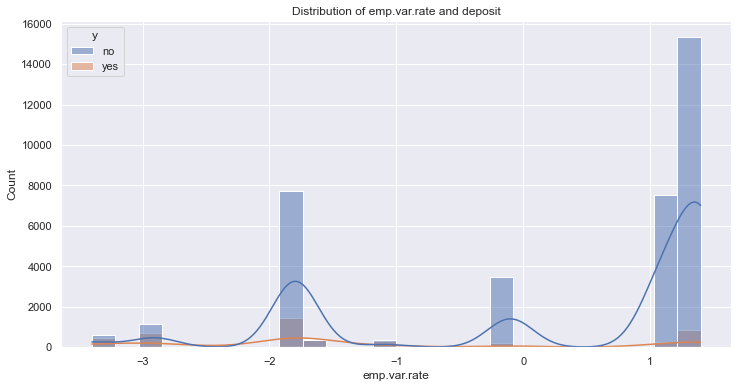

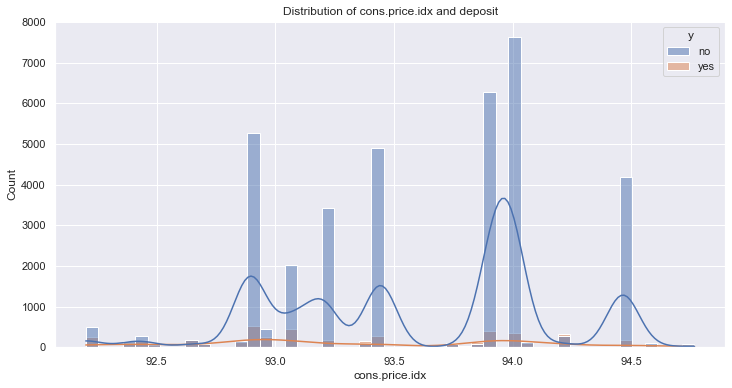

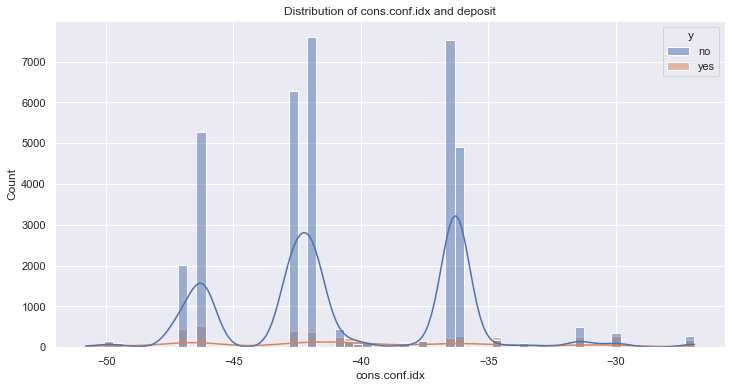

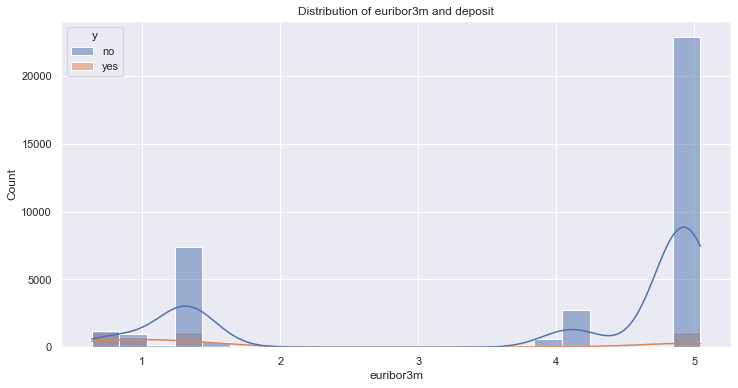

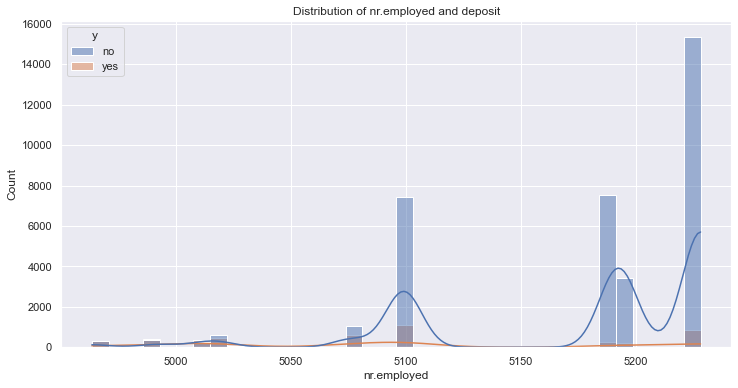

In [6]:
'''plot distribution of numeric variables and response'''
for c in df_num.columns:
    sns.histplot(x = df[c], hue = df['y'], kde = True).set(title='Distribution of {} and deposit'.format(c))
    sns.set(rc={'figure.figsize':(12,6)})
    plt.show()

## Correlation

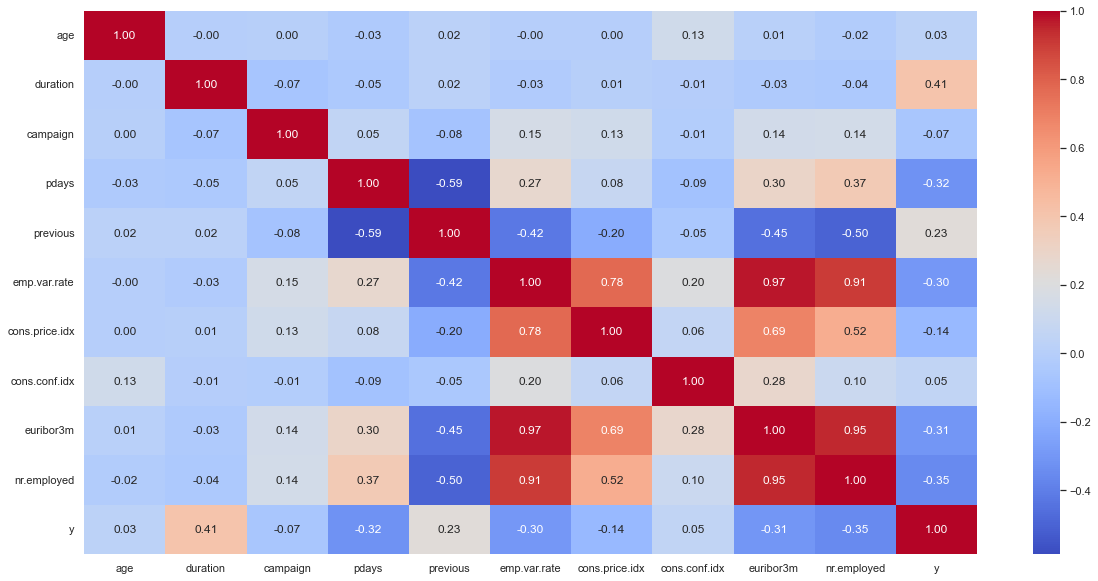

In [7]:
# Convert target variable into numeric
data = df.copy()
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# heatmap of correlations between numerical variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Outliers and Skewness

When the data is (approximately) normally distributed, we can use the Z-score treatment to deal with outliers. 

However, as we can see from the distributions, most of our columns have skewed distributions. So we can try using the IQR method. 

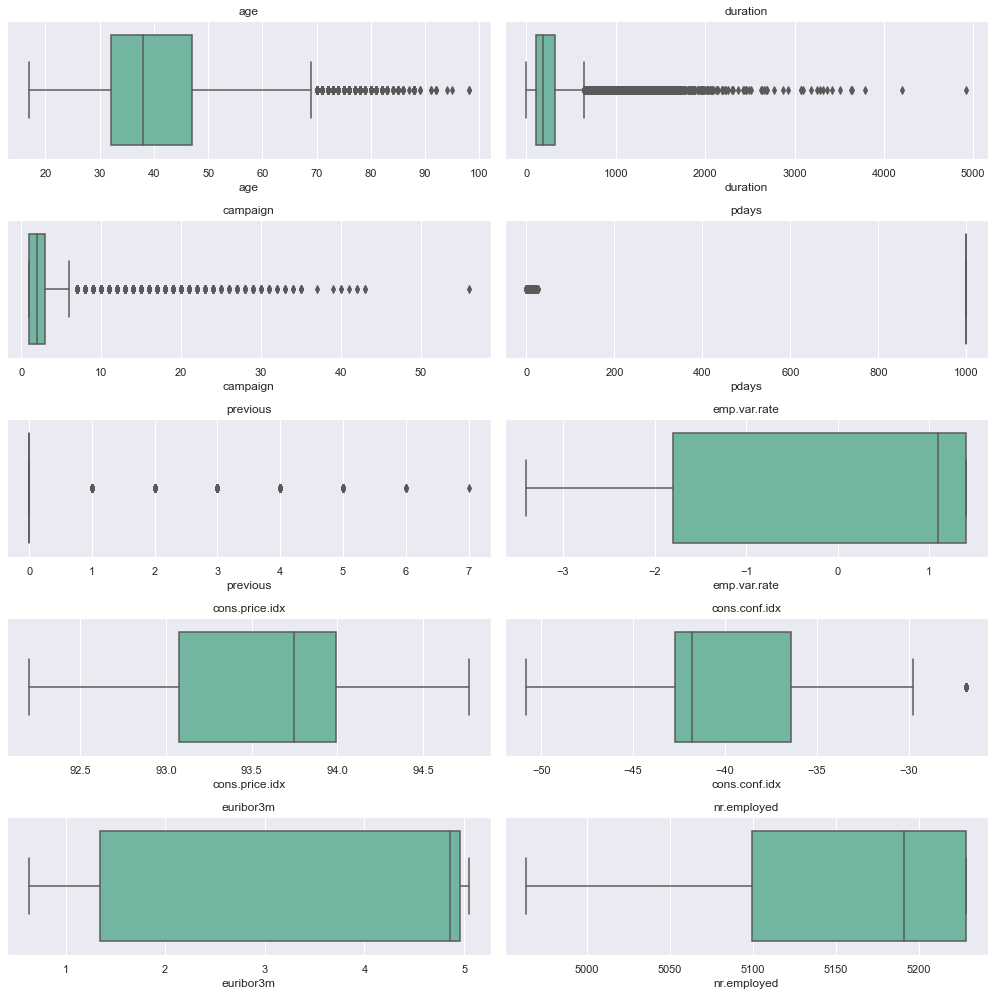

In [8]:
# plot in a grid
plt.figure(figsize=(14,14))
i = 1
for c in df_num.columns:
    plt.subplot(5, 2, i)
    i+=1
    sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
    plt.title(f'{c}')
plt.tight_layout()        
plt.show()

In [9]:
# # plot seperately
# for c in df.columns:
#     if df[c].dtype == 'int64' or df[c].dtype == 'float64':
#         plt.figure(figsize=(12,8))
#         sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
#         plt.title(f'{c}')
#         plt.show()

In [10]:
'''write functions to be utilised later to deal with outliers'''

# write a function to find outliers using IQR method
def iqr(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound
# write a function to trim outliers
def trim(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_trim = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df_trim
# write a function to cap outliers
def cap(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_cap = df.copy()
    df_cap[col] = df_cap[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_cap
# write a function to replace outliers with threshold
def thresh(df, col, thresh):
    df_thresh = df.copy()
    df_thresh[col] = df_thresh[col].apply(lambda x: thresh if x > thresh else x)
    return df_thresh
# write a function to replace outliers with median
def replace_median(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    median = df_replace[col].median()
    df_replace[col] = df_replace[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_replace
# write a function to replace outliers with mean
def replace_mean(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    mean = df_replace[col].mean()
    df_replace[col] = df_replace[col].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)
    return df_replace

In [26]:
'''write function to split plot by response'''
def split_plot(data, col, title, bar_label=False):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    fig.suptitle('Distribution of {}'.format(title), fontsize=18)
    data_no = data[data['y']==0]
    data_yes = data[data['y']==1]
    sns.histplot(data_no[col], kde=True, color='#E14906', ax = ax1).set_title('Distribution for No')
    sns.histplot(data_yes[col], kde=True, color='#A14906', ax = ax2).set_title('Distribution for Yes')
    # remove small numbers from labels to make it neat
    if bar_label:
        labels1 = [str(v) if v > 10 else '' for v in ax1.containers[0].datavalues]
        ax1.bar_label(ax1.containers[0], labels=labels1)
        labels2 = [str(v) if v else '' for v in ax2.containers[0].datavalues]
        ax2.bar_label(ax2.containers[0], labels=labels2)
    plt.show()

    # print out some stats

    # print(f'{name} -->') 
    print(data['y'].value_counts())
    print(f'Proportion of no --> {round(data["y"].value_counts()[0]/len(data),2)}')
    print(f'Proportion of yes --> {round(data["y"].value_counts()[1]/len(data),2)}')
    print('Correlation with target --> {}'.format(data[col].corr(data['y'])))
    print("")

In [12]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Age

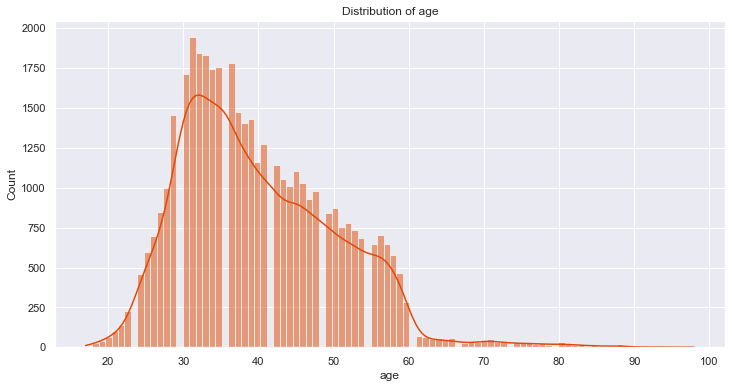

Number of unique values --> 78
Max value --> 98
Min value --> 17
Mean value --> 40.02

check correlation to response --> 0.030380536219875926


In [35]:
'''analyse age column'''

col = 'age'

sns.histplot(data[col], kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))

For the "age" column, we can tell that the distribution appears almost tri-modal but it is not heavily affected by outliers. Also, we don't want to lose meaningful information by forcing it to fit a distribution.

There is left-skewness, so we can try using log transform to see if the distribution approaches normal. 

It would seem that age is not log-normal. 

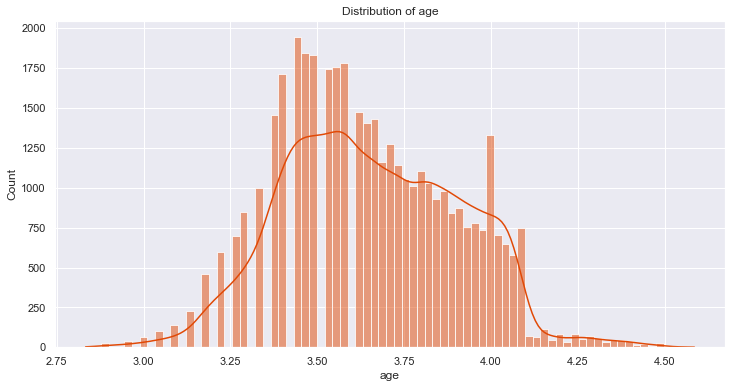

In [24]:
sns.histplot(np.log(data["age"]), kde=True, color='#E14906').set_title('Distribution of age')
plt.show()

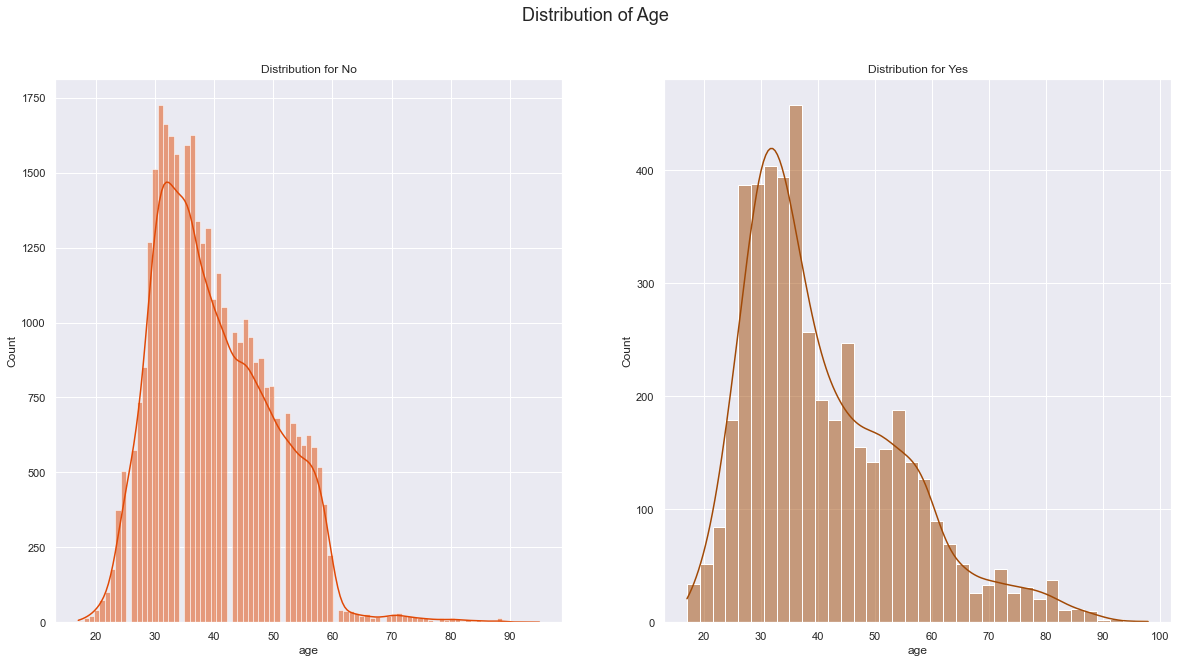

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.030380536219875926



In [30]:
'''plot splitting by response'''

split_plot(data,'age', 'Age', bar_label=False)

Observations

- There is a very slight negative correlation with response.
- The kernel density curves are almost the same shape, for all, for yes and for no.
- This means that age does not have a very strong influence on response. 

### Duration

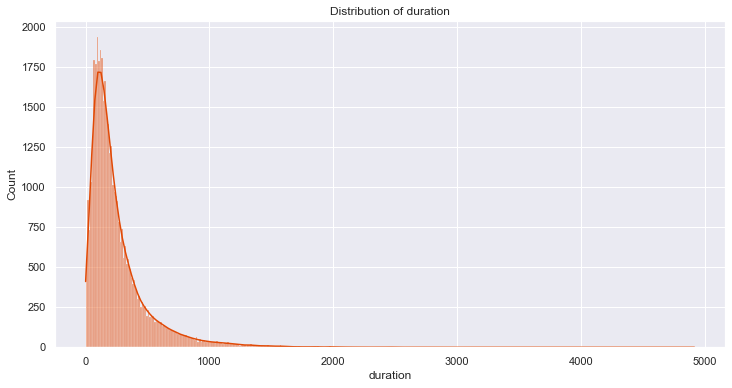

Number of unique values --> 1544
Max value --> 4918
Min value --> 0
Mean value --> 258.32

check correlation to response --> 0.4052972612685261

Proportion of values above 1500 --> 0.005
Proportion of values above 2000 --> 0.001
Proportion of values above 2500 --> 0.001


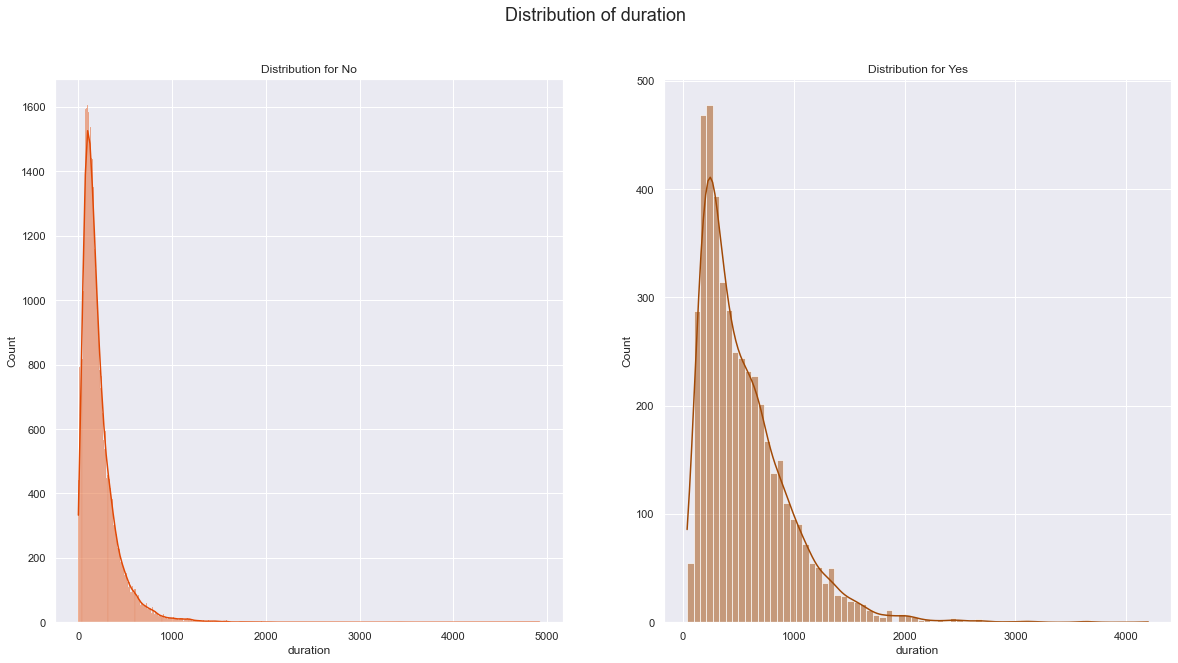

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.4052972612685261



In [42]:
'''analyse duration column'''

col = 'duration'

sns.histplot(data[col], kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")
for i in [1500,2000,2500]:
    print(f'Proportion of values above {i} --> {round(len(data[data[col] > i])/len(data),3)}')

##plot splitting by response

split_plot(data,col, col, bar_label=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


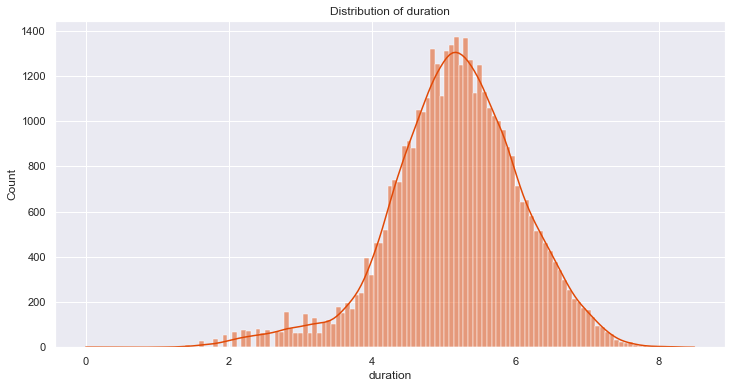

In [45]:
'''check if log-normal'''
col = 'duration'

sns.histplot(np.log(data[col]), kde=True, color='#E14906').set_title('Distribution of {}'.format(col))
plt.show()

Observations:

- The corraltion is very high but this is expected, since duration is only known after contact.
- The distribution is extrmely left-skewed. 
- Only 0.5% values are above 1500.
- Log transform approaches normal, but the distribution still has a heavy left tail.

### Campaign

The "camapign" column tells us how many times the client was contacted during the campaign. 

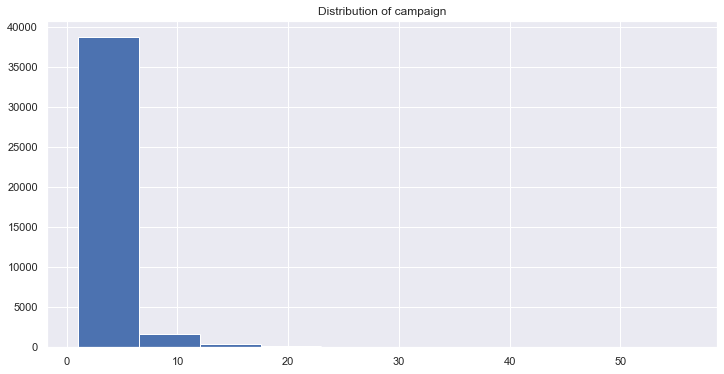

Unique values in campaign --> 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Number of unique values in campaign --> 
42
Proportion of values above 10 --> 0.021
Proportion of values above 15 --> 0.009
Proportion of values above 20 --> 0.004


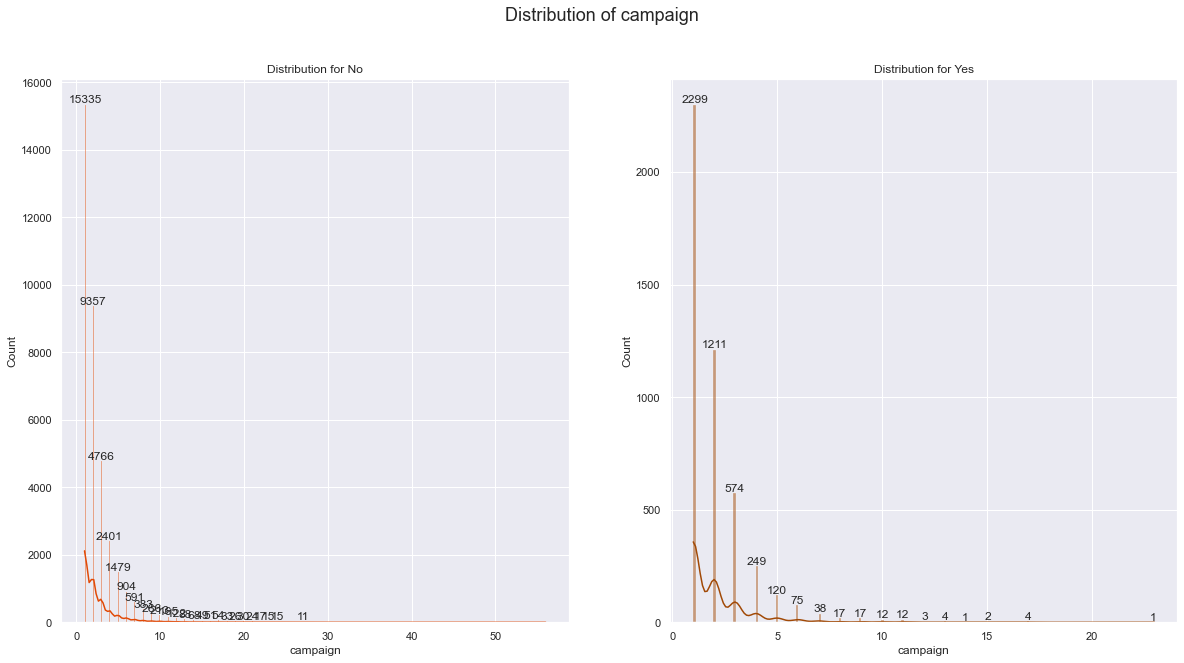

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.06636068437609938



In [39]:
'''analyse campaign column'''

plt.hist(data['campaign'], bins=10)
plt.title('Distribution of campaign')
plt.show()
print(f'Unique values in campaign --> ')
print(data['campaign'].unique())
print(f'Number of unique values in campaign --> ')
print(len(data['campaign'].unique()))
# find proportion of values above thresholds
for i in [10,15,20]:
    print(f'Proportion of values above {i} --> {round(len(data[data["campaign"] > i])/len(data),3)}')

## plot splitting by response

split_plot(data,'campaign', 'campaign', bar_label=True)
    

Observations

- The correlation to response is small but negative.
- The kernel density shapes look very similar for both responses.
- The density curve has almost the same shape as the curve for the unsplit dataset.
- Only 2% of the values are above 10, and barely 1% are above 15. In this case it might not be a bad idea to use capping to impute these outliers. We may set the threshold to 10 or 15 and compare results.


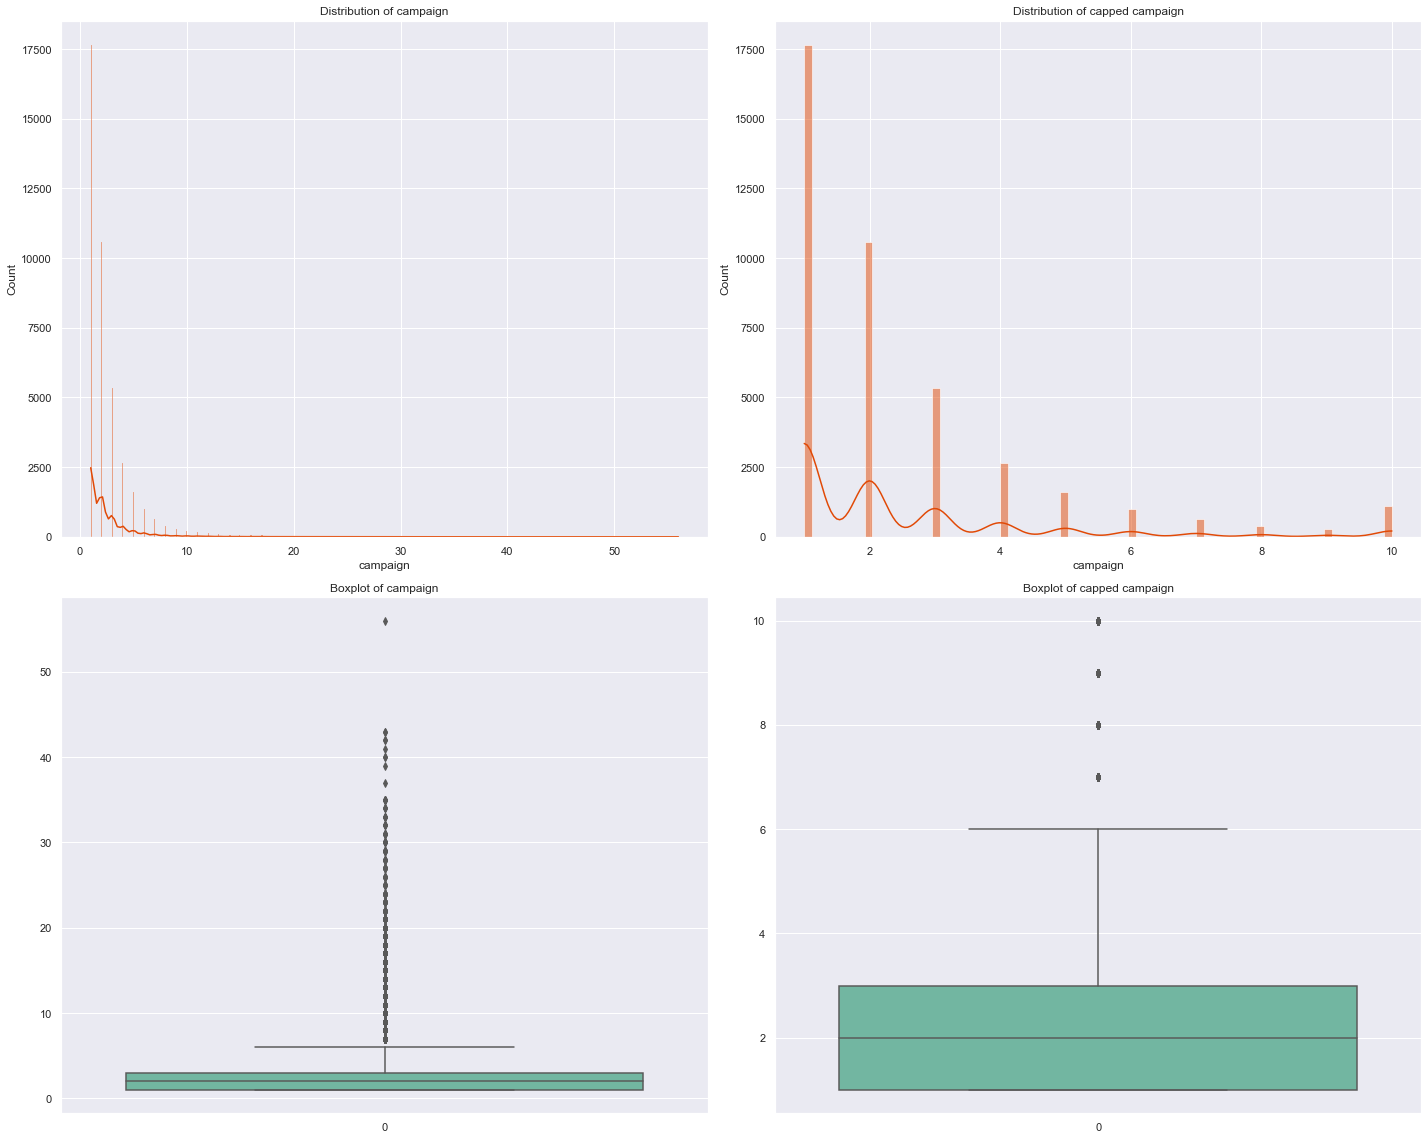

In [16]:
# use thresh function to cap outliers in campaign column
data_camp = thresh(data,'campaign', 10)  # try threshold of 10, 15, 20
# plot histograms and boxplots 
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20,16))
sns.histplot(data['campaign'], kde=True, color='#E14906', ax = ax1[0])
ax1[0].set_title('Distribution of campaign')
sns.histplot(data_camp['campaign'], kde=True, color='#E14906', ax = ax1[1])
ax1[1].set_title('Distribution of capped campaign')
sns.boxplot(data['campaign'], palette='Set2', ax = ax2[0])
ax2[0].set_title('Boxplot of campaign')
sns.boxplot(data_camp['campaign'], palette='Set2', ax = ax2[1])
ax2[1].set_title('Boxplot of capped campaign')
plt.tight_layout()
plt.show()

The plots show some improvement after applying the 'thresh' function. It seems like the threshold can be further lowered from 10 to about 6. In fact the plot with thresh = 6 does about the same thing as using 'cap' function with IQR.

### Pdays

The "pdays" columns tells us how many days have passed since last contact made during the previous campaign. The value 999 means there was no contact in the previous campaign. From the analysis below we can see that 96% of the customers were never contacted. Since this is such a large proportion, it will dominate any effect this variable has on the response. It would be worthwhile to examine the rest of the data to see whether there is any difference. 

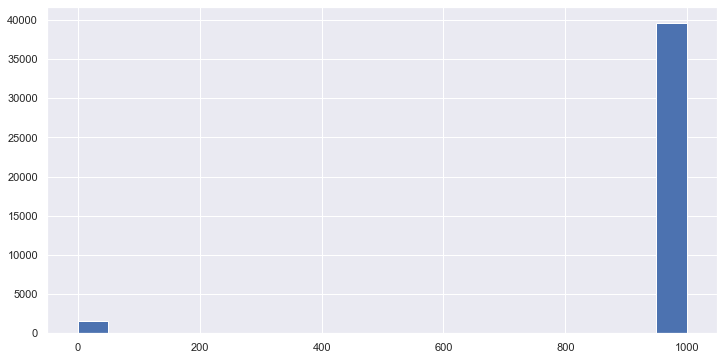

Number of unique values --> 27
Max value --> 999
Min value --> 0
Number of values equal to 999 --> 39661
Proportion of values equal to 999 --> 0.96

check correlation to response --> -0.324947586385585


In [17]:
'''analyse pdays column'''

plt.hist(data['pdays'], bins=20)
plt.show()
print('Number of unique values --> {}'.format(data['pdays'].nunique()))
print('Max value --> {}'.format(max(data['pdays'])))
print('Min value --> {}'.format(min(data['pdays'])))
print(f'Number of values equal to 999 --> {len(df[df["pdays"] == 999])}')
print(f'Proportion of values equal to 999 --> {round(len(df[df["pdays"] == 999])/len(df),2)}')
print("")
print('check correlation to response --> {}'.format(data['pdays'].corr(data['y'])))

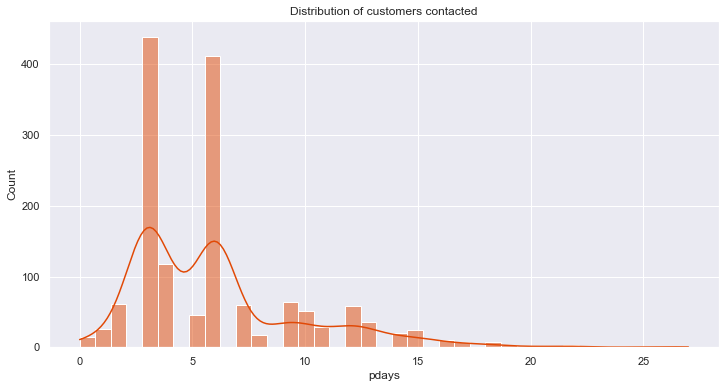

total number of customers contacted = 1515
Customer contacted min = 0
Customer contacted max = 27

check correlation to response --> -0.03522348402414881


In [18]:
'''analyse customers who were contacted'''

contact = data[data['pdays']!=999]
# check distribution of pdays without 999
sns.histplot(data = contact, x = 'pdays', kde=True, color='#E14906').set_title(
                                            'Distribution of customers contacted')
plt.show()
print('total number of customers contacted = {}'.format(len(contact)))
print('Customer contacted min = {}'.format(contact['pdays'].min()))
print('Customer contacted max = {}'.format(contact['pdays'].max()))
print("")
print('check correlation to response --> {}'.format(contact['pdays'].corr(contact['y'])))

We can get better insight into the data by examining this small section (4%) in isolation. 

The distribution is now left skewed instead of right. There is still a negative correlation with the response variable but it is much smaller, -0.035 compared to -0.32. 

Let us split the data by response (yes or no) and examine the differences between:
- all customers
- customers who were contacted in previous campaign
- customers who were not contacted in previous campaign

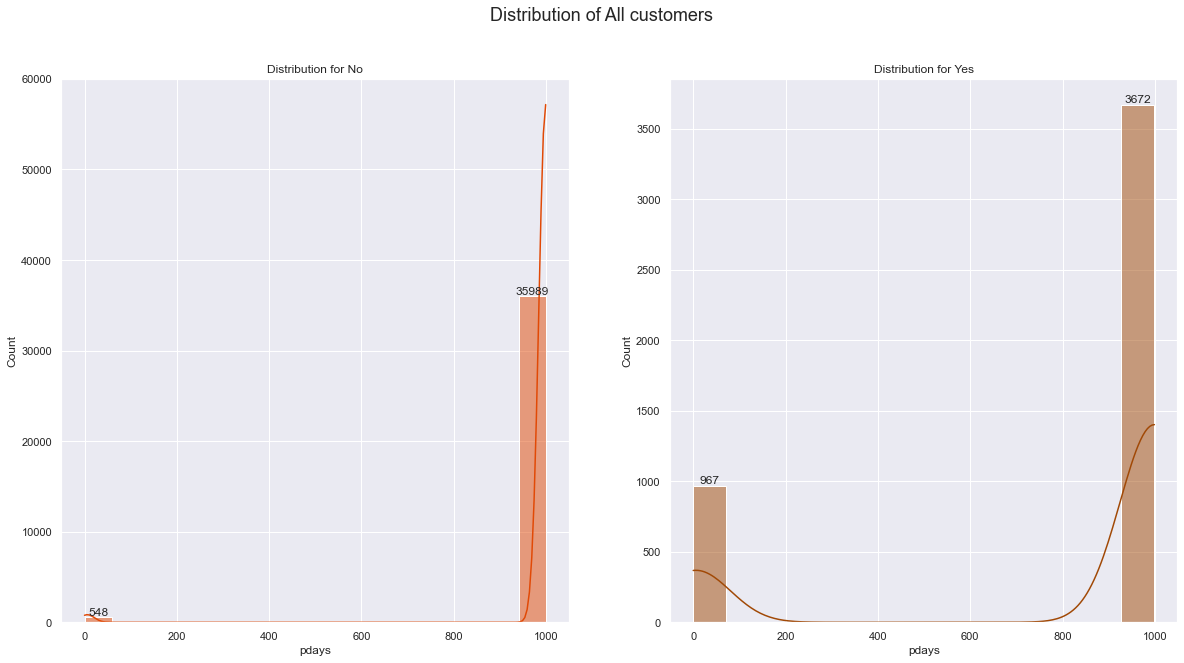

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.324947586385585



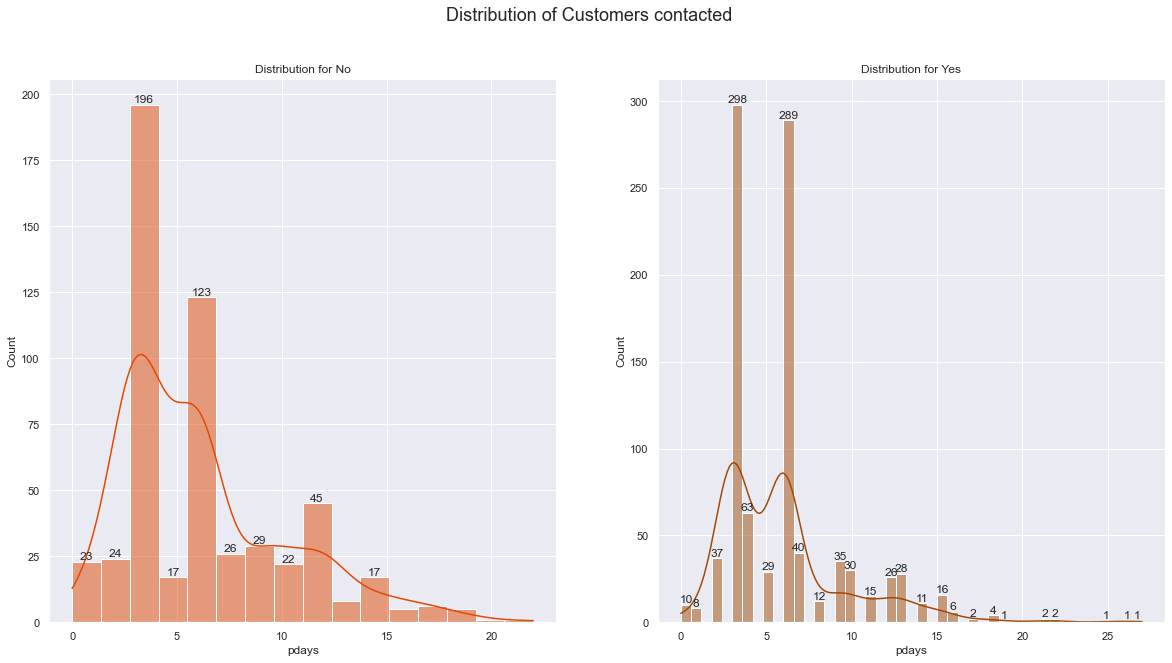

1    967
0    548
Name: y, dtype: int64
Proportion of no --> 0.36
Proportion of yes --> 0.64
Correlation with target --> -0.03522348402414881



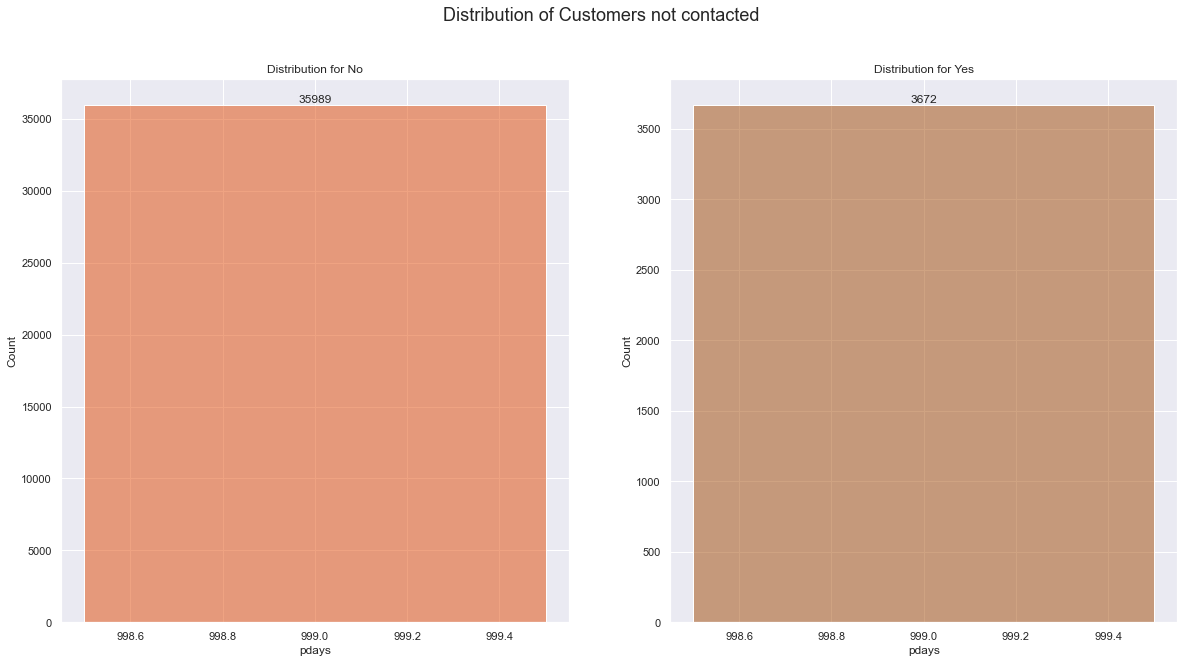

0    35989
1     3672
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> nan



In [33]:
'''plot splitting by response'''

all_customers = data
customer_contacted = data[data['pdays']!=999]
customer_not_contacted = data[data['pdays']==999]

titles = ['All customers', 'Customers contacted', 'Customers not contacted']
for i, df in enumerate([all_customers, customer_contacted, customer_not_contacted]):
    split_plot(df,'pdays', titles[i], bar_label=True)

This examination has revealed many things.
- Probability of positive response (yes) is 0.11 for all customers.
- Probability of positive response is 0.64 for cuustomers who were contacted.
- Probability of positive response is 0.09 for customers who were not contacted. 
- The correlation to response is much lower if customer has been contacted compared to all customers.
- The distribution of positive and negative response 'pdays' is quite similar. Although the values are higher for positive response (yes), the kde's have almost the same shape.

### Previous

The "previous" column tells us how many times the client was contacted during the previous campaign. As we can see from the analysis below, only 2% of clients were contacted more than 5 times. Capping might be the way to deal with outliers here, or better solution might be to create bins of variable length. 


It can be seen from the heat map that pdays and previous are highly correlated. It might be worth considering to drop on of these columns. 

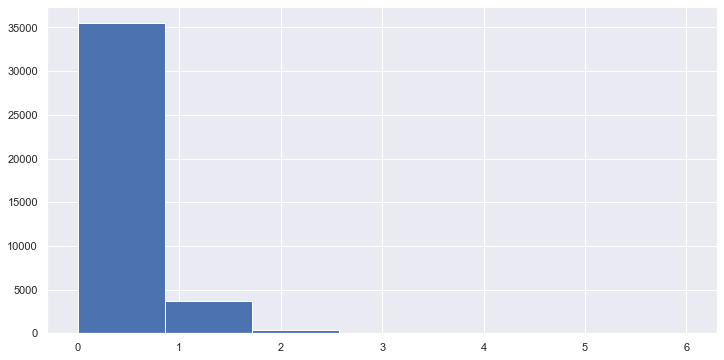

Unique values in previous --> 
[0 1 2 3 4 5 6]
Number of unique values in previous --> 
7
Proportion of values above 3 --> 0.0
Proportion of values above 4 --> 0.0
Proportion of values above 5 --> 0.0
0    35551
1     3696
2      349
3       50
4       12
5        2
6        1
Name: previous, dtype: int64
Proportion of customers not contacted --> 0.9


In [20]:
'''analyse previous column'''

plt.hist(df['previous'], bins=7)
plt.show()
print(f'Unique values in previous --> ')
print(df['previous'].unique())
print(f'Number of unique values in previous --> ')
print(len(df['previous'].unique()))
# find proportion of values above thresholds
for i in [3,4,5]:
    print(f'Proportion of values above {i} --> {round(len(df[df["previous"] > i])/len(df),3)}')
print(df['previous'].value_counts())
print('Proportion of customers not contacted --> {}'.format(round(len(df[df["previous"] == 0])/len(df),2)))
    

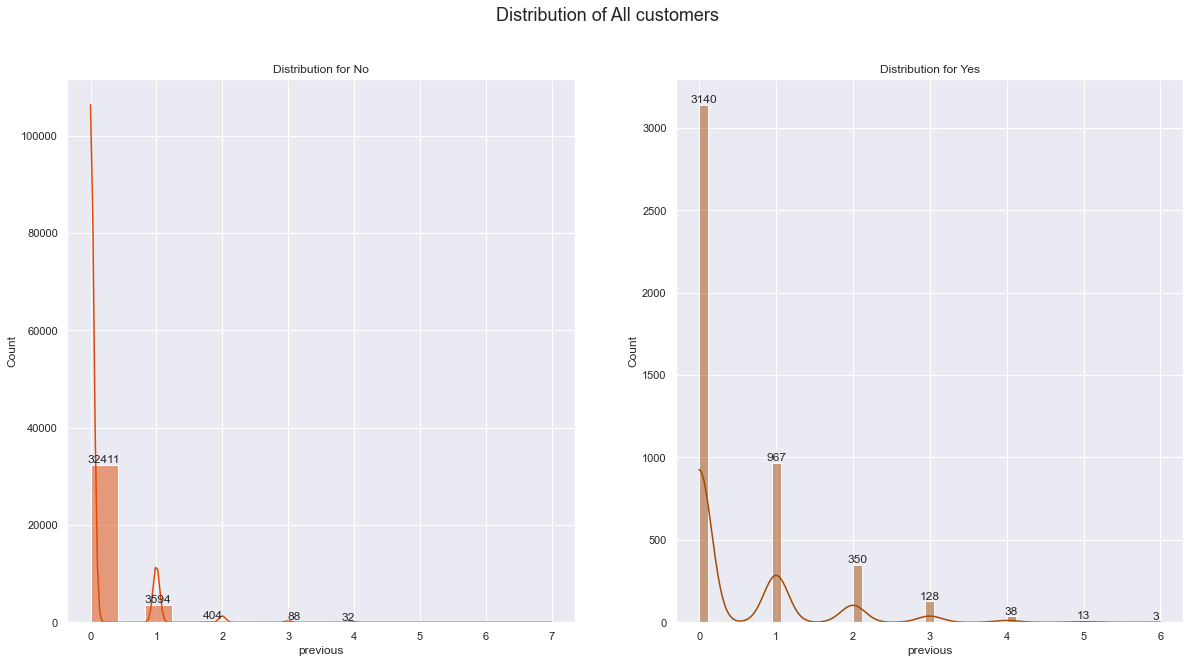

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.2302015702154481



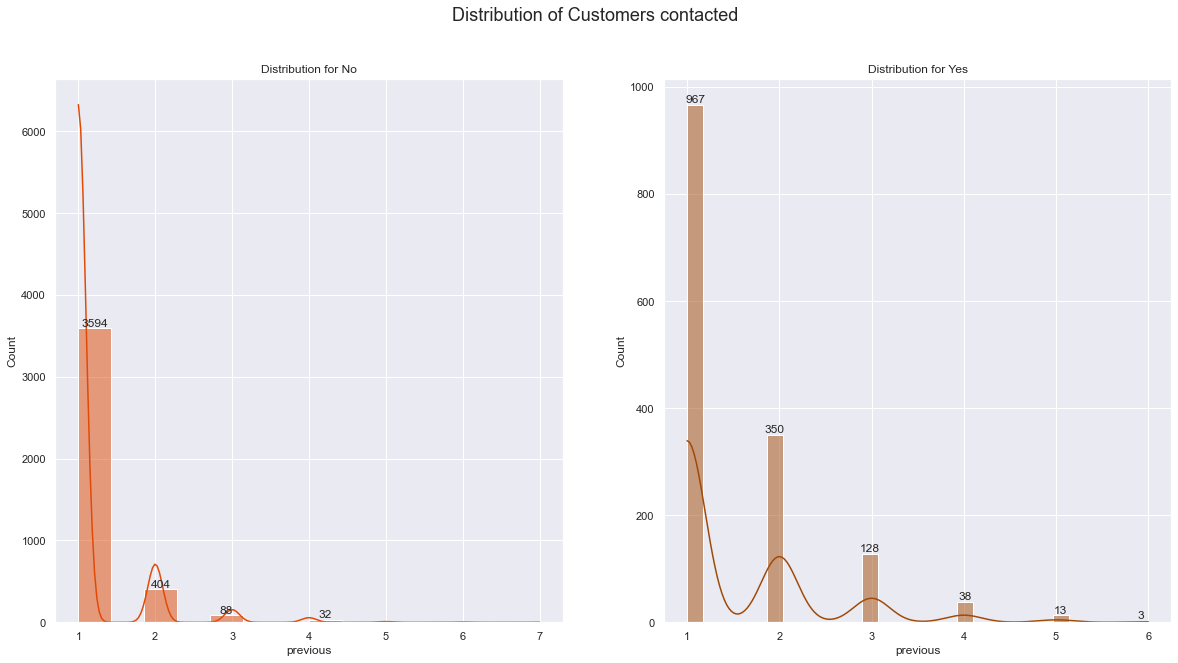

0    4126
1    1499
Name: y, dtype: int64
Proportion of no --> 0.73
Proportion of yes --> 0.27
Correlation with target --> 0.24382251470816377



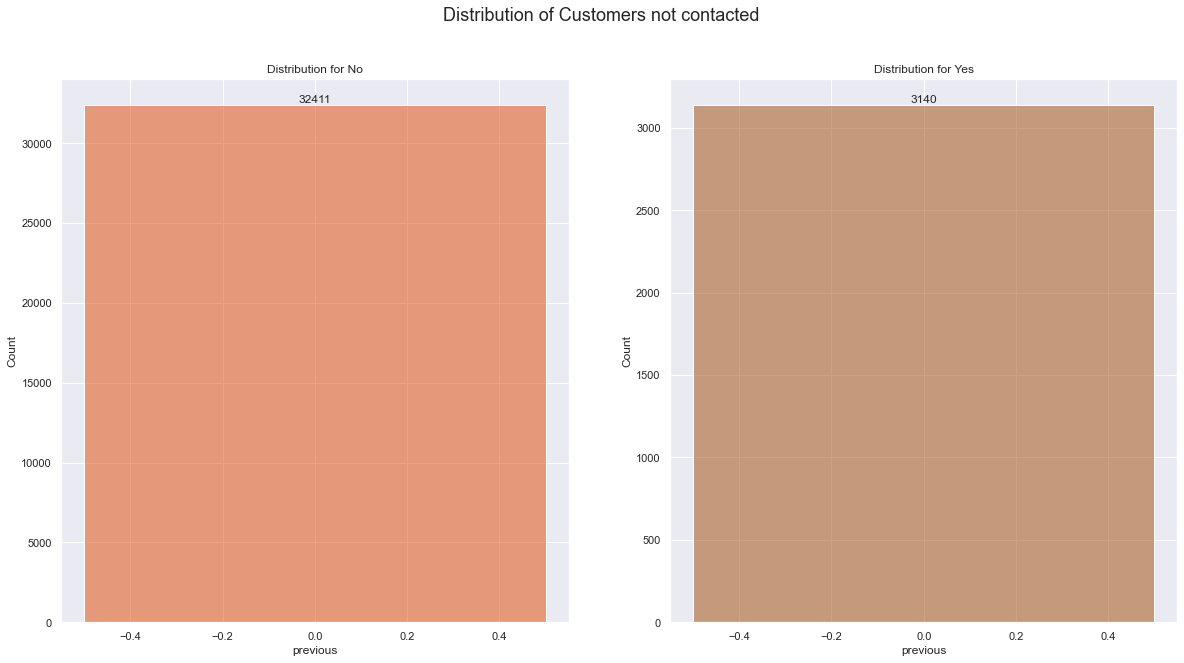

0    32411
1     3140
Name: y, dtype: int64
Proportion of no --> 0.91
Proportion of yes --> 0.09
Correlation with target --> nan



In [34]:
'''plot splitting by response'''

all_customers = data
customer_contacted = data[data['previous']!=0]
customer_not_contacted = data[data['previous']==0]

titles = ['All customers', 'Customers contacted', 'Customers not contacted']

for i, df in enumerate([all_customers, customer_contacted, customer_not_contacted]):
    split_plot(df,'previous', titles[i], bar_label=True)

Observations:

- When we compare the whole dataset to only those customers who were contacted, the ratio of positive response rises from 0.11 to 0.27.
- The correlation with the response stays approximately the same or all and contacted.
- The proportion of customers not contacted is 90%. This is different from the proportion we got when we applied the same selection criterion to "pdays".
- Only 2% of the values are above 3, only 24 that are 5 or above. We can try using threshold for this variable as well, although, there are so few unique values (8) that it should not make much of a difference in model training. 

The ratio of no to yes in the last result differs slightly from the dataset. 

Checks below show that there are 4110 entries which might be wrong.

In [ ]:
check1 = data[(data['pdays']==999) & (data['previous']!=0)] ## no contact and contact - should be empty
check2 = data[(data['pdays']!=999) & (data['previous']==0)] ## contact and no contact - correct
check3 = data[(data['pdays']==999) & (data['previous']==0)] ## no contact and no contact - correct
check4 = data[(data['pdays']!=999) & (data['previous']!=0)] ## contact and contact - correct
print(len(check1))
print(len(check2))
print(len(check3))
print(len(check4))

4110
0
35551
1515


In [46]:
df_num.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### emp.var.rate

It seems Employment Variation Rate is a obsolete measure since no information can be found on it in OECD, World Bank or Eurostat databases. From what can be gathered, EVR measures the percentage change in employment levels over time, in this case over quarters.

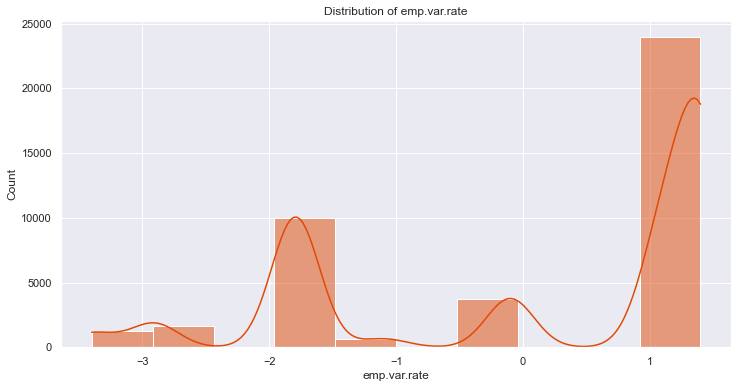

Number of unique values --> 10
Unique values --> [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Max value --> 1.4
Min value --> -3.4
Mean value --> 0.08

check correlation to response --> -0.29828850424620634



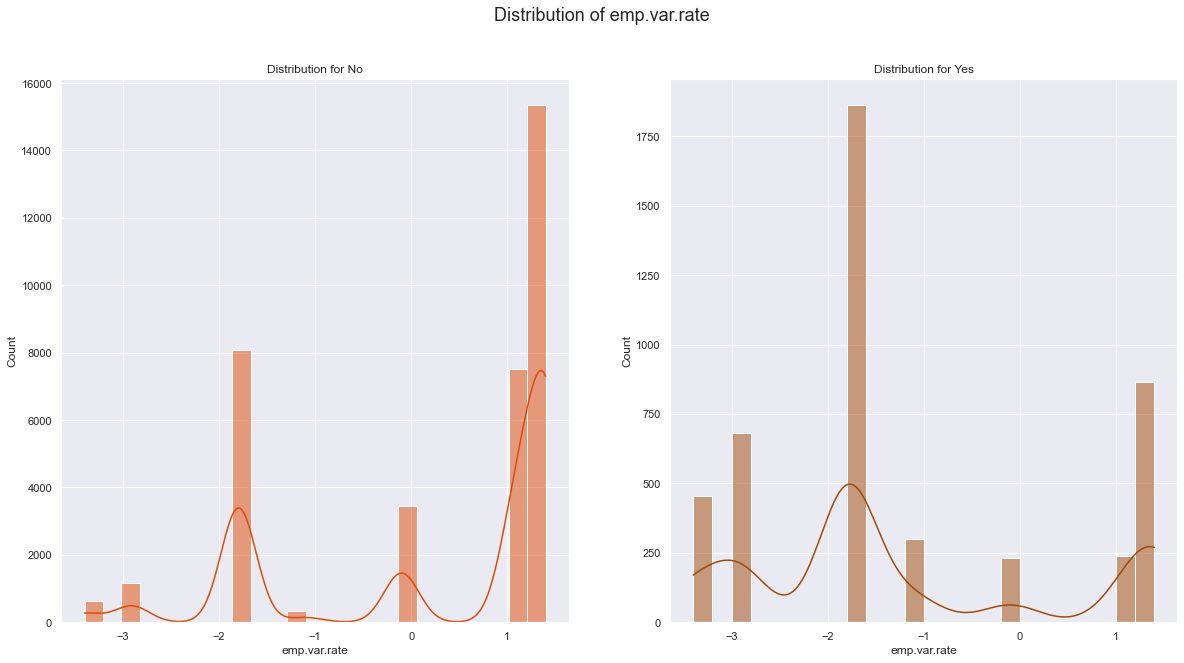

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.29828850424620634



In [50]:
'''analyse emp.var.rate column'''

col = 'emp.var.rate'

sns.histplot(data[col], kde=True, color='#E14906', bins = 10).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

Observations:

- There is a somewhat high negative correlation.
- This might be due to the fact that when EVR is high, the job market is uncertain and people are less likely to invest in a term deposit. However, correlation does not entail causation.
- The KDE curves are similar in shape for all, no and yes. So EVR might not have a strong influence on the respoonse.

### cons.price.idx

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by households for a basket of goods and services. It is commonly used as a measure of inflation. (United States Bureau of Labor Statistics (BLS) (2022), "Consumer Price Index", BLS Handbook of Methods, https://www.bls.gov/opub/hom/pdf/homch17.pdf (accessed on 6 March 2023)).

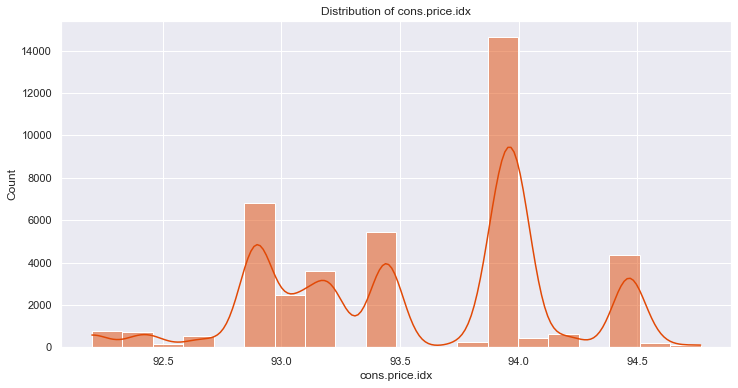

Number of unique values --> 26
Unique values --> [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
Max value --> 94.767
Min value --> 92.201
Mean value --> 93.58

check correlation to response --> -0.13613397100783628



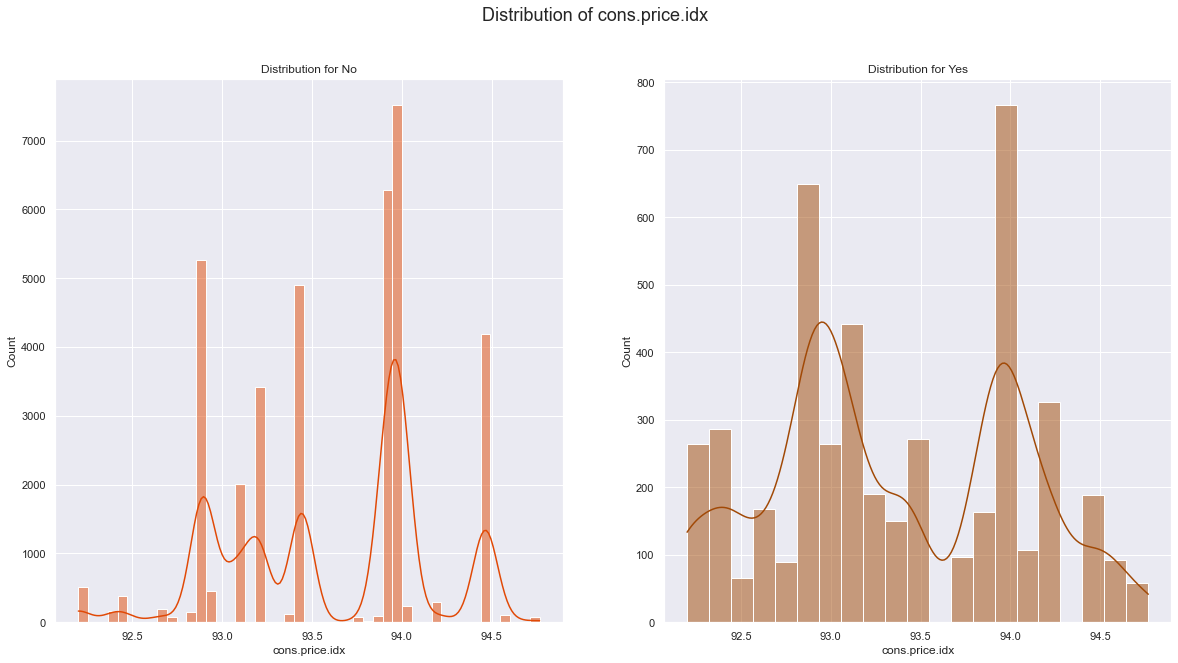

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.13613397100783628



In [52]:
'''analyse cons.price.idx column'''

col = 'cons.price.idx'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### cons.conf.idx

The Consumer Confidence Index (CCI) is a measure of the degree of optimism or pessimism that consumers feel about the state of the economy and their own financial situation. It is a survey-based index that is designed to capture consumers' expectations about the future of the economy and their own financial well-being (The Conference Board (2022), "Consumer Confidence Survey", The Conference Board website, https://www.conference-board.org/data/consumerconfidence.cfm (accessed on 6 March 2023)).

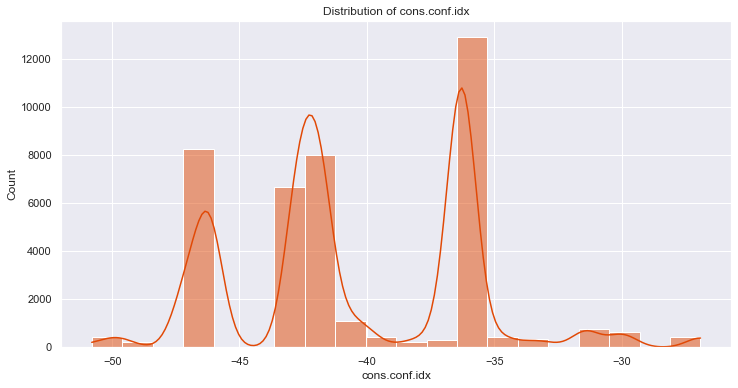

Number of unique values --> 26
Max value --> -26.9
Min value --> -50.8
Mean value --> -40.5

check correlation to response --> 0.05480181650949957



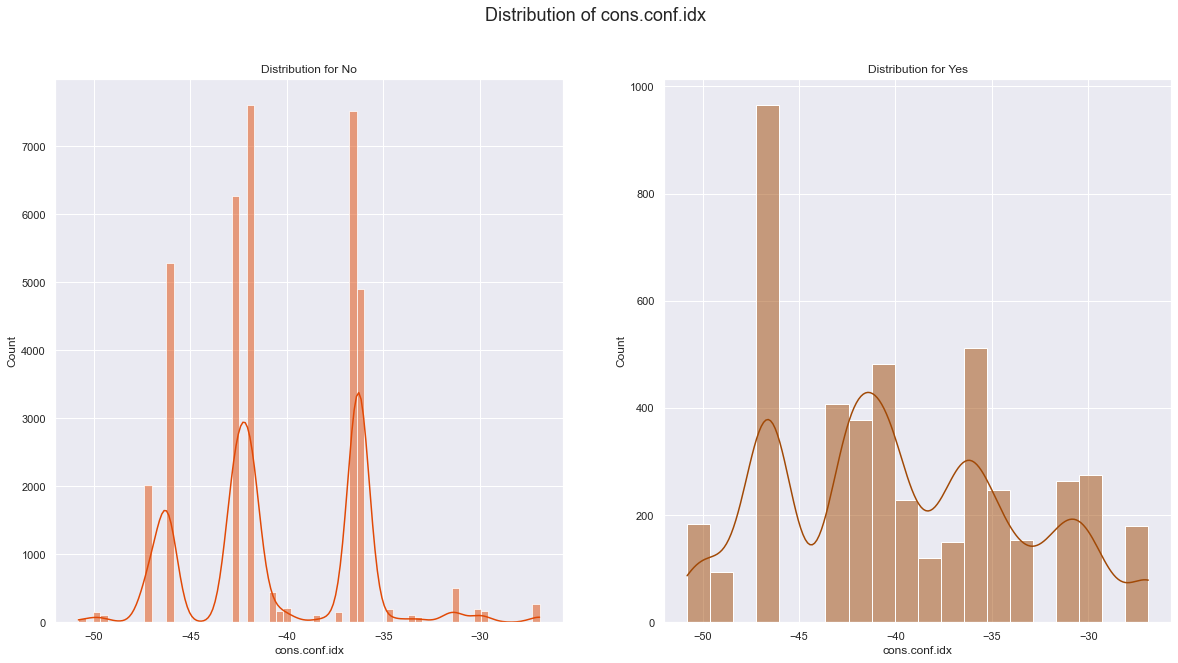

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> 0.05480181650949957



In [53]:
'''analyse cons.conf.idx column'''

col = 'cons.conf.idx'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### euribor3m

EURIBOR 3M is a benchmark interest rate that is widely used in the Eurozone. It is the rate at which banks in the Eurozone lend to each other for a period of three months. The name "EURIBOR" stands for Euro Interbank Offered Rate (European Money Markets Institute (2022), "EURIBOR® 3 Months", European Money Markets Institute website, https://www.emmi-benchmarks.eu/euribor-org/euribor-rates/euribor-3-months.html (accessed on 6 March 2023)).

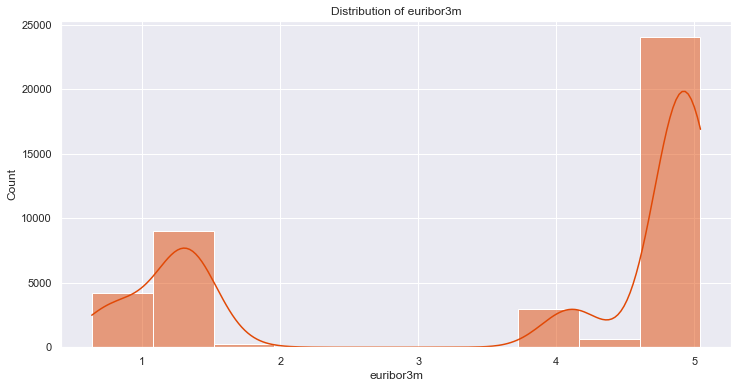

Number of unique values --> 316
Max value --> 5.045
Min value --> 0.634
Mean value --> 3.62

check correlation to response --> -0.3077403955846894



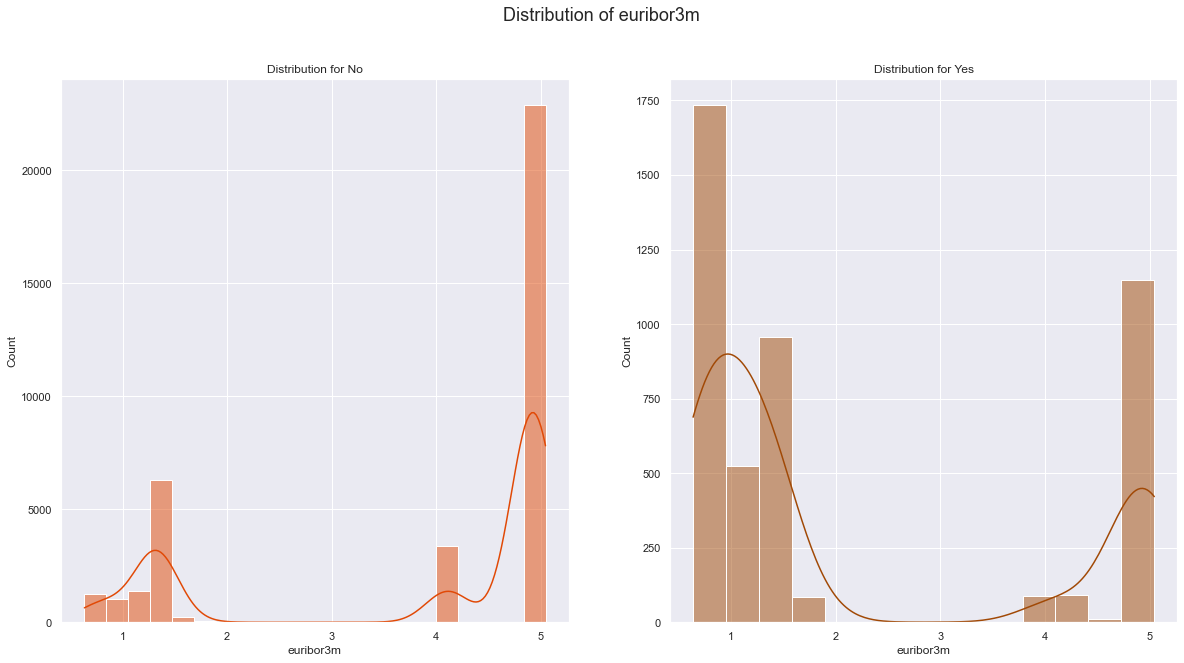

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.3077403955846894



In [55]:
'''analyse euribor3m column'''

col = 'euribor3m'

sns.histplot(data[col], kde=True, color='#E14906', bins = 10).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)

### nr.employed

Number of employees ?!?!

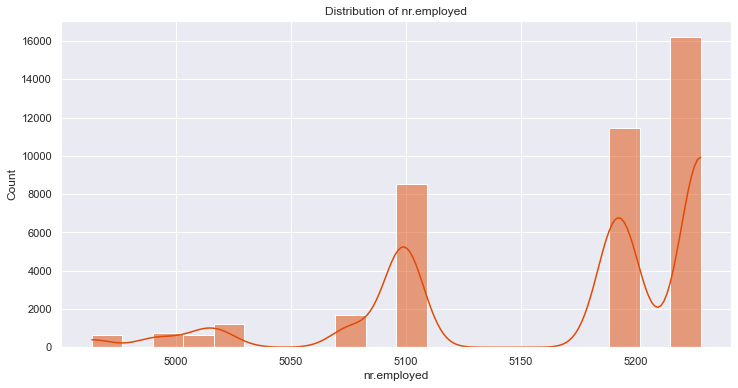

Number of unique values --> 11
Max value --> 5228.1
Min value --> 4963.6
Mean value --> 5167.03

check correlation to response --> -0.3546690153826728



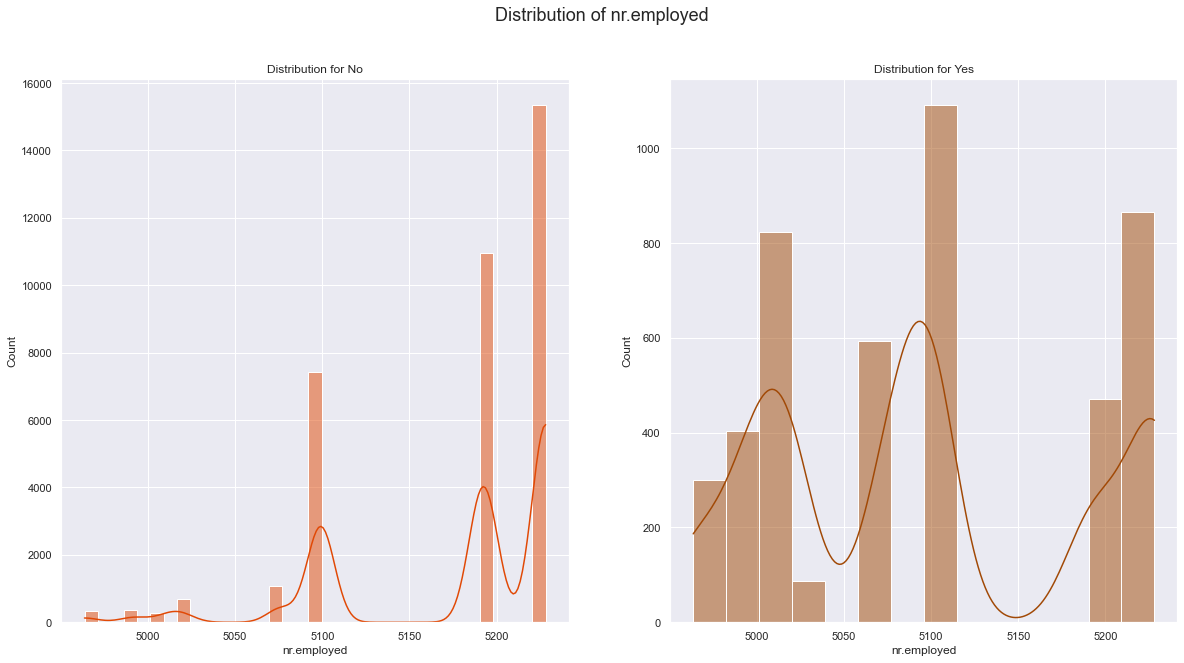

0    36537
1     4639
Name: y, dtype: int64
Proportion of no --> 0.89
Proportion of yes --> 0.11
Correlation with target --> -0.3546690153826728



In [57]:
'''analyse nr.employed column'''

col = 'nr.employed'

sns.histplot(data[col], kde=True, color='#E14906', bins = 20).set_title('Distribution of {}'.format(col))
plt.show()
print('Number of unique values --> {}'.format(data[col].nunique()))
# print('Unique values --> {}'.format(data[col].unique()))
print('Max value --> {}'.format(max(data[col])))
print('Min value --> {}'.format(min(data[col])))
print('Mean value --> {}'.format(round(data[col].mean(),2)))
print("")
print('check correlation to response --> {}'.format(data[col].corr(data['y'])))
print("")

split_plot(data,col, col, bar_label=False)